<a href="https://colab.research.google.com/github/XiaochuanLi2018/HMEQ/blob/main/HMEQ_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis**

### **Load Packages**

In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import eli5
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp, info_plots

RANDOM_STATE = 12345

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

### **Load and Summary the Data**

In [8]:
df = pd.read_csv('/content/drive/MyDrive/GEICO/hmeq_data.csv')

In [9]:
print("Complete HMEQ - rows:", df.shape[0]," columns:", df.shape[1])

Complete HMEQ - rows: 3515  columns: 13


In [10]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
1,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
2,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
3,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
4,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [11]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,0.087909,19187.880512,75623.036415,106875.773257,9.165292,0.146515,0.270555,181.082668,1.023044,21.954481,34.120568
std,0.283203,11315.617764,44761.833125,54200.456754,7.667258,0.576416,0.795853,82.396940,1.533828,9.360130,8.093908
min,0.000000,1700.000000,5076.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,11900.000000,48850.500000,70989.000000,3.000000,0.000000,0.000000,118.676290,0.000000,16.000000,29.382991
50%,0.000000,16900.000000,66590.000000,94071.000000,7.000000,0.000000,0.000000,176.530327,0.000000,21.000000,34.980525
75%,0.000000,23600.000000,92598.000000,122175.000000,14.000000,0.000000,0.000000,230.272746,2.000000,27.000000,39.005824
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,65.000000,144.189001


### **Check missing data**

In [12]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,DEBTINC,CLNO,NINQ,CLAGE,DELINQ,DEROG,YOJ,JOB,REASON,VALUE,MORTDUE,LOAN,BAD
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **EDA**

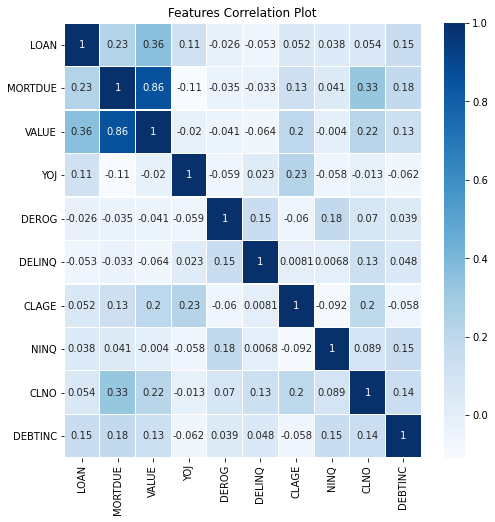

In [13]:
plt.figure(figsize = (8,8))
plt.title("Features Correlation Plot")
corr = df.drop(columns='BAD').corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.1,cmap="Blues",annot=True)
plt.show()

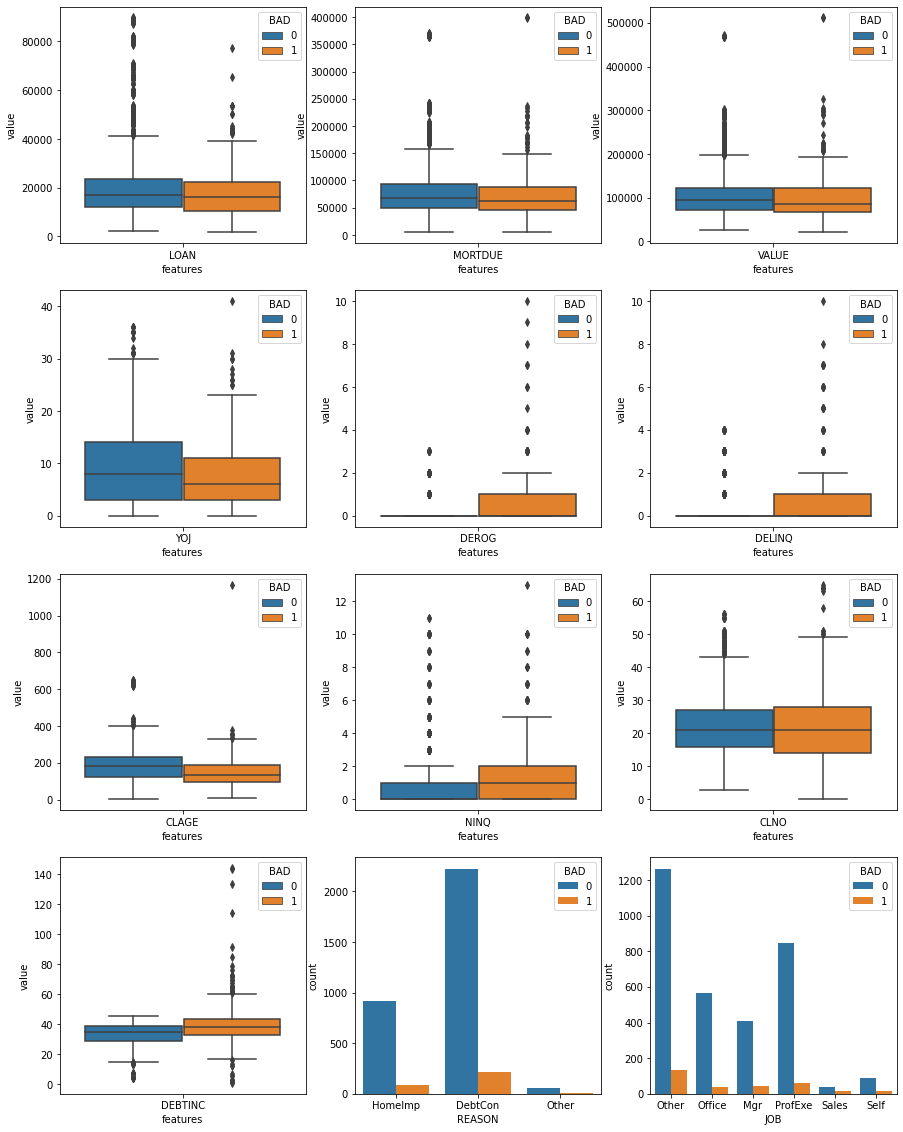

In [14]:
data1=df[['BAD','LOAN']];data2=df[['BAD','MORTDUE']];data3=df[['BAD','VALUE']];data4=df[['BAD','YOJ']];data5=df[['BAD','DEROG']]
data6=df[['BAD','DELINQ']];data7=df[['BAD','CLAGE']];data8=df[['BAD','NINQ']];data9=df[['BAD','CLNO']];data10=df[['BAD','DEBTINC']];
data1=pd.melt(data1,id_vars="BAD",var_name="features",value_name='value')
data2=pd.melt(data2,id_vars="BAD",var_name="features",value_name='value')
data3=pd.melt(data3,id_vars="BAD",var_name="features",value_name='value')
data4=pd.melt(data4,id_vars="BAD",var_name="features",value_name='value')
data5=pd.melt(data5,id_vars="BAD",var_name="features",value_name='value')
data6=pd.melt(data6,id_vars="BAD",var_name="features",value_name='value')
data7=pd.melt(data7,id_vars="BAD",var_name="features",value_name='value')
data8=pd.melt(data8,id_vars="BAD",var_name="features",value_name='value')
data9=pd.melt(data9,id_vars="BAD",var_name="features",value_name='value')
data10=pd.melt(data10,id_vars="BAD",var_name="features",value_name='value')

plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
sns.boxplot(x="features", y="value", hue="BAD", data=data1)
plt.subplot(4,3,2)
sns.boxplot(x="features", y="value", hue="BAD", data=data2)
plt.subplot(4,3,3)
sns.boxplot(x="features", y="value", hue="BAD", data=data3)
plt.subplot(4,3,4)
sns.boxplot(x="features", y="value", hue="BAD", data=data4)
plt.subplot(4,3,5)
sns.boxplot(x="features", y="value", hue="BAD", data=data5)
plt.subplot(4,3,6)
sns.boxplot(x="features", y="value", hue="BAD", data=data6)
plt.subplot(4,3,7)
sns.boxplot(x="features", y="value", hue="BAD", data=data7)
plt.subplot(4,3,8)
sns.boxplot(x="features", y="value", hue="BAD", data=data8)
plt.subplot(4,3,9)
sns.boxplot(x="features", y="value", hue="BAD", data=data9)
plt.subplot(4,3,10)
sns.boxplot(x="features", y="value", hue="BAD", data=data10)
plt.subplot(4,3,11)
sns.countplot(x='REASON',hue='BAD',data=df)
plt.subplot(4,3,12)
sns.countplot(x='JOB',hue='BAD',data=df)
plt.show()

### **Distribution of the target variable**

In [15]:
temp = df["BAD"].value_counts()
count_df = pd.DataFrame({'Class':temp.index,"values":temp.values})
count_df

,Class,values
0,0,3206
1,1,309


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


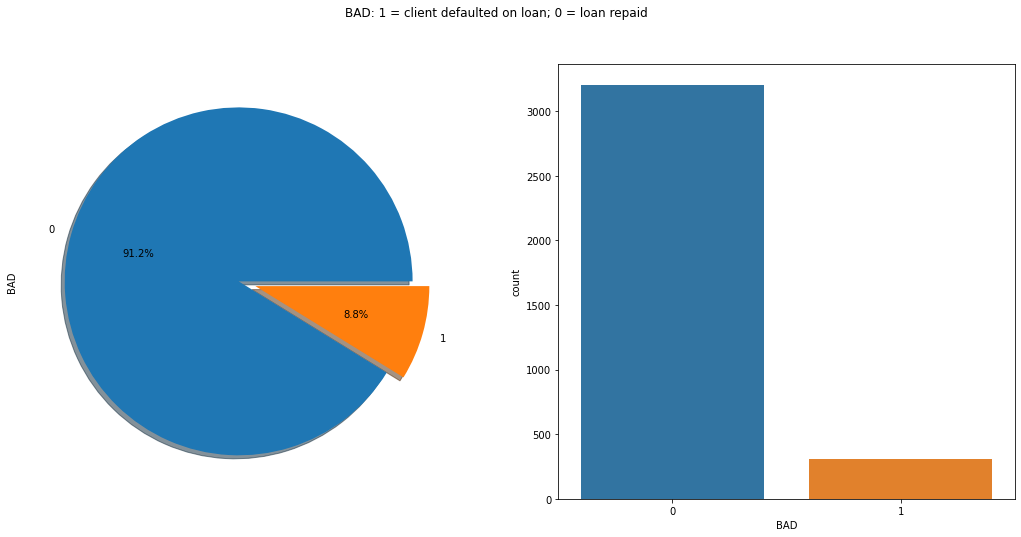

In [16]:
f,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8)) 
t = f.suptitle("BAD: 1 = client defaulted on loan; 0 = loan repaid", fontsize=12)
df["BAD"].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%", ax=ax1, shadow=True)
sns.countplot("BAD", data=df, ax=ax2)
plt.show()

### **Variable Encoding**

In [18]:
new_df = pd.get_dummies(df, prefix=['REASON', 'JOB'])
new_df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,REASON_Other,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,0,1,0,0,0
1,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,0,1,0,0,0
2,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,0,1,0,0,0,0
3,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,0,1,0,0,0,0,0
4,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,0,1,0,0,0,0


### **Calculate and Rank the correlations between predictors and the response**

In [19]:
new_df.corr()['BAD'].sort_values(ascending=False)

BAD               1.000000
DELINQ            0.277014
DEROG             0.261015
DEBTINC           0.230266
NINQ              0.125705
JOB_Sales         0.077010
JOB_Self          0.031480
JOB_Other         0.024846
JOB_Mgr           0.017962
CLNO              0.014500
REASON_Other      0.013278
REASON_DebtCon    0.001478
REASON_HomeImp   -0.005610
MORTDUE          -0.011912
VALUE            -0.022895
LOAN             -0.030597
JOB_Office       -0.039584
JOB_ProfExe      -0.040906
YOJ              -0.064752
CLAGE            -0.116332
Name: BAD, dtype: float64

### **Split data in train and test sets**

In [20]:
y = new_df['BAD']
X = new_df.drop(columns=['BAD'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)

In [24]:
temp = y_test.value_counts()
count_df = pd.DataFrame({'Class':temp.index,"values":temp.values})
count_df

,Class,values
0,0,640
1,1,63


### **SMOTE**

In [25]:
features = new_df.drop(columns=['BAD'],axis=1).columns.to_list()

In [26]:
temp = y_train.value_counts()
count_df = pd.DataFrame({'Class':temp.index,"values":temp.values})
count_df

,Class,values
0,0,2566
1,1,246


In [28]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
comp_df_train = pd.DataFrame(X_train,columns=features) 
comp_df_train['BAD'] = y_train

In [30]:
temp = comp_df_train["BAD"].value_counts()
count_df = pd.DataFrame({'Class':temp.index,"values":temp.values})
count_df

,Class,values
0,1,2566
1,0,2566


## **Predictive models**

### **Define predictors and target values**

Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [31]:
y_train = comp_df_train['BAD']
X_train = comp_df_train.drop(columns=['BAD'])

In [32]:
print("Predictors train shape:", X_train.shape)
print("Target train shape:", y_train.shape)
print("Predictors test shape:", X_test.shape)
print("Target test shape:", y_test.shape)

Predictors train shape: (5132, 19)
Target train shape: (5132,)
Predictors test shape: (703, 19)
Target test shape: (703,)


#### Pre-defined Functions

##### Confusion matrix

In [34]:
def conf_mat(true_value, pred_value, method):
  cm = confusion_matrix(true_value, pred_value)
  fig,(ax1) = plt.subplots(ncols=1,figsize=(5,5))
  sns.heatmap(cm,annot=True,ax=ax1,
              linewidths=0.2,linecolor="Darkblue",cmap="Blues")
  plt.title( method+" Classification Confusion Matrix", fontsize=14)
  plt.xlabel("Predicts")
  plt.ylabel("Test")
  plt.show()

##### ROC Curve

In [35]:
def roccurve(model, features_test, target_test, method):
  pred_prob = model.predict_proba(features_test)
  pred_prob = pred_prob[:,1]
  fpr,tpr,thresholds = roc_curve(target_test, pred_prob)
  roc_auc = auc(fpr,tpr)
  plt.title("ROC Curve: "+ method)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'k--')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

##### Logistic Regression

In [37]:
def glm_clf(X_train,y_train,X_test,y_test):
  clf = LogisticRegression(max_iter=500)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print('LOGISTIC REGRESSION: ')
  print(classification_report(y_test, y_pred,zero_division = 1))
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  conf_mat(y_test, y_pred, 'Logistic Regression')
  roccurve(clf, X_test, y_test, 'Logistic Regression')
  return clf

##### SVM

In [39]:
def svm_clf(X_train,y_train,X_test,y_test):
  param_grid = {'C':[0.1,1,10,100],
          'gamma':[1,0.1,0.01],
          'kernel': ['rbf','sigmoid']}
  grid_model = GridSearchCV(SVC(probability=True), param_grid, cv=10, n_jobs=-1)
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('SVM: ')
  print(classification_report(y_test, y_pred,zero_division = 1))
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(grid_model.best_params_)
  conf_mat(y_test, y_pred, 'SVM')
  roccurve(grid_model, X_test, y_test, 'SVM')
  return grid_model

##### Naive Bayes 

In [40]:
def nb_clf(X_train,y_train,X_test,y_test):
  clf = GaussianNB()
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print('NAIVE BAYES: ')
  print(classification_report(y_test, y_pred,zero_division = 1))
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  conf_mat(y_test, y_pred, 'Naive Bayes')
  roccurve(clf, X_test, y_test, 'Naive Bayes')
  return clf

##### Decision Tree

In [42]:
def tree_clf(X_train,y_train,X_test,y_test):
  param_grid = {'max_depth' : [10,20,30,40]}
  grid_model = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), param_grid, cv=10, n_jobs=-1)
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('DECISION TREE: ')
  print(classification_report(y_test, y_pred,zero_division = 1))
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(grid_model.best_params_)
  conf_mat(y_test, y_pred, 'Decison Tree')
  roccurve(grid_model, X_test, y_test, 'Decision Tree')
  return grid_model

##### KNN

In [44]:
def neigh(X_train,y_train,X_test,y_test):
  param_grid = {'n_neighbors':[i for i in range(5,20)],
          'weights':['uniform', 'distance']}
  grid_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, n_jobs=-1)
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('KNN_CLASSIFIER: ')
  print(classification_report(y_test, y_pred,zero_division = 1))
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(grid_model.best_params_)
  conf_mat(y_test, y_pred, 'XGBoost')
  roccurve(grid_model, X_test, y_test, 'XGBoost')
  return grid_model

##### Random Forest

In [45]:
def forest(X_train,y_train,X_test,y_test):
  param_grid = {'n_estimators':[20,50,100,150,200],
          'max_depth' : [2,3,4,5,6],
          'max_features':['sqrt', 'log2']}
  grid_model = GridSearchCV(RandomForestClassifier(random_state = RANDOM_STATE), param_grid, cv=10, n_jobs=-1)
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('RANDOM FOREST: ')
  print(classification_report(y_test, y_pred,zero_division = 1))
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(grid_model.best_params_)
  conf_mat(y_test, y_pred, 'Random Forest')
  roccurve(grid_model, X_test, y_test, 'Random Forest')
  return grid_model

##### AdaBoost

In [ ]:
def adb(X_train,y_train,X_test,y_test):
  param_grid = {'learning_rate':[0.05,0.1,0.2,0.3],
          'n_estimators':[20,50,100,150,200]}
  grid_model = GridSearchCV(AdaBoostClassifier(random_state =RANDOM_STATE), param_grid, cv=10, n_jobs=-1)
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('AdaBoost: ')
  print(classification_report(y_test, y_pred,zero_division = 1))
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(grid_model.best_params_)
  conf_mat(y_test, y_pred, 'AdaBoost')
  roccurve(grid_model, X_test, y_test, 'AdaBoost')
  return grid_model

##### LightGBM

In [ ]:
def lgbm(X_train,y_train,X_test,y_test):
  param_grid = {'learning_rate':[0.05,0.1,0.2,0.3],
          'n_estimators':[20,50,100,150,200],
          'max_depth' : [2,3,4,5,6],
          'importance_type': ['gain','entropy']}
  grid_model = GridSearchCV(LGBMClassifier(random_state = RANDOM_STATE), param_grid, cv=10, n_jobs=-1)
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('LightGBM: ')
  print(classification_report(y_test, y_pred,zero_division = 1))
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(grid_model.best_params_)
  conf_mat(y_test, y_pred, 'LightGBM')
  roccurve(grid_model, X_test, y_test, 'LightGBM')
  return grid_model

##### XGBoost

In [ ]:
def xgb(X_train,y_train,X_test,y_test):
  param_grid = {'learning_rate':[0.05,0.1,0.2,0.3],
          'n_estimators':[20,50,100,150,200],
          'max_depth' : [2,3,4,5,6],
          'importance_type': ['gain','entropy']}
  grid_model = GridSearchCV(XGBClassifier(random_state = RANDOM_STATE), param_grid, cv=10, n_jobs=-1)
  grid_model.fit(X_train,y_train)
  y_pred = grid_model.predict(X_test)
  print('XGBoost: ')
  print(classification_report(y_test, y_pred,zero_division = 1))
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(grid_model.best_params_)
  conf_mat(y_test, y_pred, 'XGBoost')
  roccurve(grid_model, X_test, y_test, 'XGBoost')
  return grid_model

### **Logistic Regression classification**

LOGISTIC REGRESSION: 
              precision    recall  f1-score   support

           0       0.96      0.59      0.73       640
           1       0.15      0.76      0.26        63

    accuracy                           0.60       703
   macro avg       0.56      0.67      0.49       703
weighted avg       0.89      0.60      0.69       703

Accuracy: 60.17%


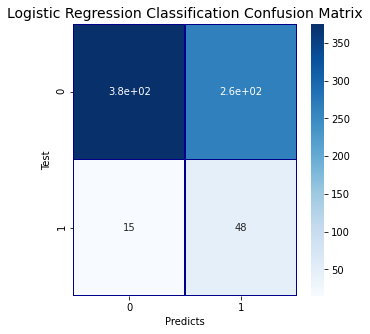

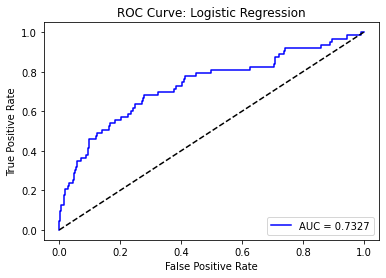

In [ ]:
glm_model = glm_clf(X_train,y_train,X_test,y_test)

In [ ]:
logit_model = sm.Logit(y_train,X_train)
result = logit_model.fit()
print(result.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.502305
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 5132
Model:                          Logit   Df Residuals:                     5114
Method:                           MLE   Df Model:                           17
Date:                Sat, 12 Dec 2020   Pseudo R-squ.:                  0.2753
Time:                        21:47:59   Log-Likelihood:                -2577.8
converged:                       True   LL-Null:                       -3557.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
LOAN           -1.782e-05   4.22e-06     -4.223      0.000   -2.61e-05   -9.55e-06
MORTDUE        -

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


### **SVM classification**

SVM: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       640
           1       1.00      0.00      0.00        63

    accuracy                           0.91       703
   macro avg       0.96      0.50      0.48       703
weighted avg       0.92      0.91      0.87       703

Accuracy: 91.04%
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


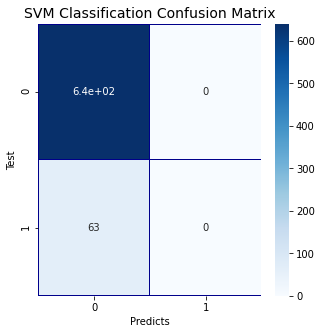

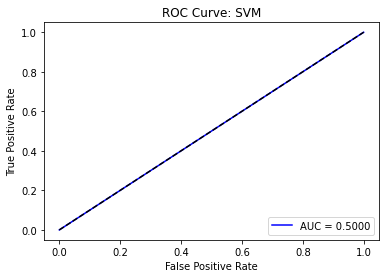

In [ ]:
svm_model = svm_clf(X_train,y_train,X_test,y_test)

### **Naive bayes classification**

NAIVE BAYES: 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       640
           1       0.30      0.48      0.37        63

    accuracy                           0.85       703
   macro avg       0.62      0.68      0.64       703
weighted avg       0.89      0.85      0.87       703

Accuracy: 85.49%


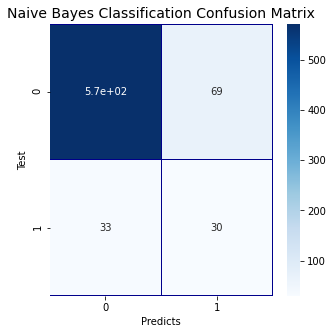

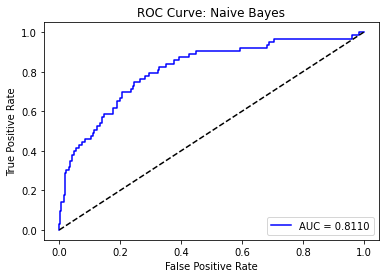

In [ ]:
nb_model = nb_clf(X_train,y_train,X_test,y_test)

### **Decision tree classification**

DECISION TREE: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       640
           1       0.77      0.70      0.73        63

    accuracy                           0.95       703
   macro avg       0.87      0.84      0.85       703
weighted avg       0.95      0.95      0.95       703

Accuracy: 95.45%
{'max_depth': 20}


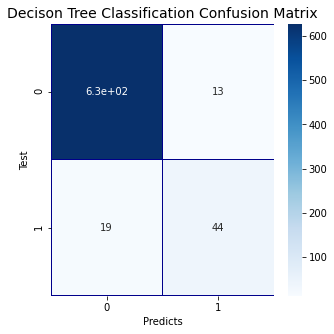

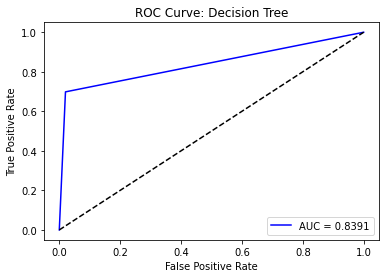

In [ ]:
dt_model = tree_clf(X_train,y_train,X_test,y_test)

### **Random forest classification**

RANDOM FOREST: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       640
           1       0.52      0.51      0.51        63

    accuracy                           0.91       703
   macro avg       0.73      0.73      0.73       703
weighted avg       0.91      0.91      0.91       703

Accuracy: 91.32%
{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 50}


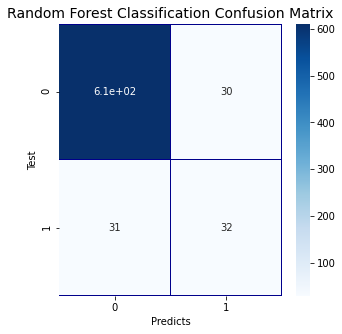

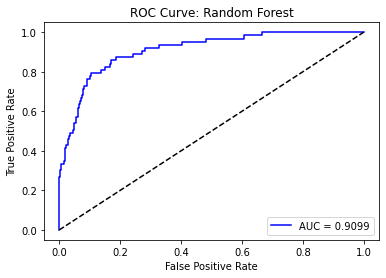

In [ ]:
rf = forest(X_train,y_train,X_test,y_test)

### **K-Nearest Neighbor classification**

KNN_CLASSIFIER: 
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       640
           1       0.19      0.49      0.28        63

    accuracy                           0.77       703
   macro avg       0.57      0.65      0.57       703
weighted avg       0.87      0.77      0.81       703

Accuracy: 77.24%
{'n_neighbors': 6, 'weights': 'distance'}


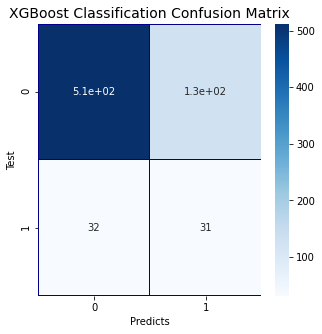

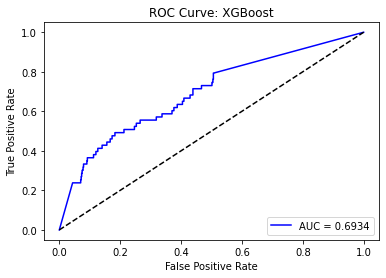

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
neigh(X_train,y_train,X_test,y_test)

### **AdaBoost classification**

AdaBoost: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       640
           1       0.52      0.54      0.53        63

    accuracy                           0.91       703
   macro avg       0.74      0.75      0.74       703
weighted avg       0.92      0.91      0.92       703

Accuracy: 91.47%
{'learning_rate': 0.3, 'n_estimators': 200}


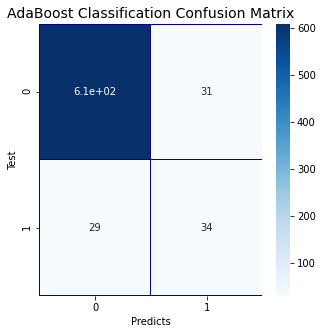

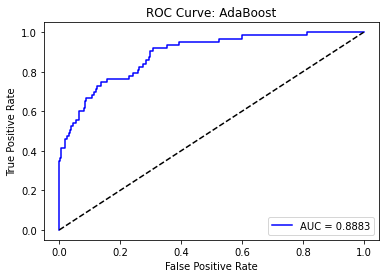

In [ ]:
ada_model = adb(X_train,y_train,X_test,y_test)

### **LightGBM classification**

LightGBM: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       640
           1       0.98      0.75      0.85        63

    accuracy                           0.98       703
   macro avg       0.98      0.87      0.92       703
weighted avg       0.98      0.98      0.97       703

Accuracy: 97.58%
{'importance_type': 'gain', 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 150}


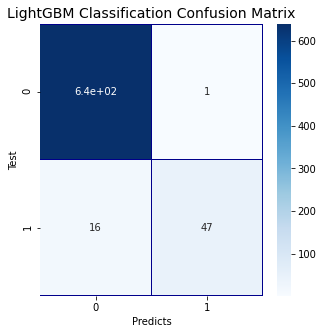

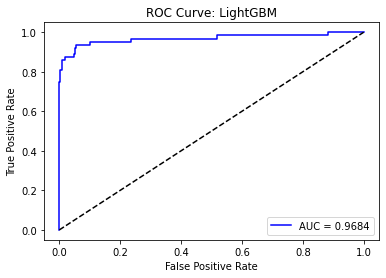

In [ ]:
lgbm_model = lgbm(X_train,y_train,X_test,y_test)

### **XGBoost classification**

XGBoost: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       640
           1       0.93      0.63      0.75        63

    accuracy                           0.96       703
   macro avg       0.95      0.82      0.87       703
weighted avg       0.96      0.96      0.96       703

Accuracy: 96.30%
{'importance_type': 'gain', 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}


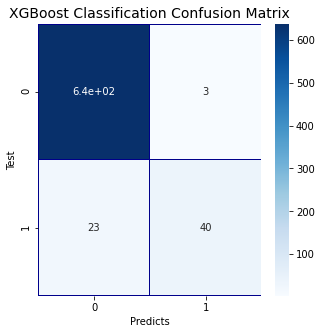

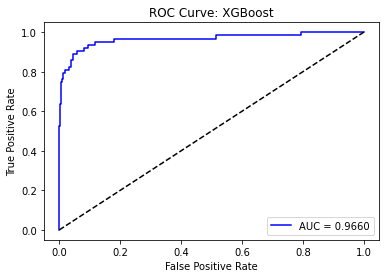

In [ ]:
xgb_model = xgb(X_train,y_train,X_test,y_test)

## **The Explanation**

### **LightGBM**

#### **Permutation Importance**

In [ ]:
perm = PermutationImportance(lgbm_model, random_state=RANDOM_STATE).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0387 ± 0.0087,DEBTINC
0.0367 ± 0.0079,DELINQ
0.0225 ± 0.0046,CLAGE
0.0202 ± 0.0125,MORTDUE
0.0182 ± 0.0028,DEROG
0.0179 ± 0.0059,VALUE
0.0171 ± 0.0065,LOAN
0.0137 ± 0.0059,CLNO
0.0131 ± 0.0033,YOJ
0.0091 ± 0.0080,NINQ


The values towards the top are the most important features, and those towards the bottom matter least. 

The first number in each row shows how much performance decreased with a random shuffling (in this case, using **"accuracy"** as the performance metric).

The second value measures how performance varied from one-reshuffling to the next, measuring the amount of randomness.

#### **Partial Dependence Plot**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


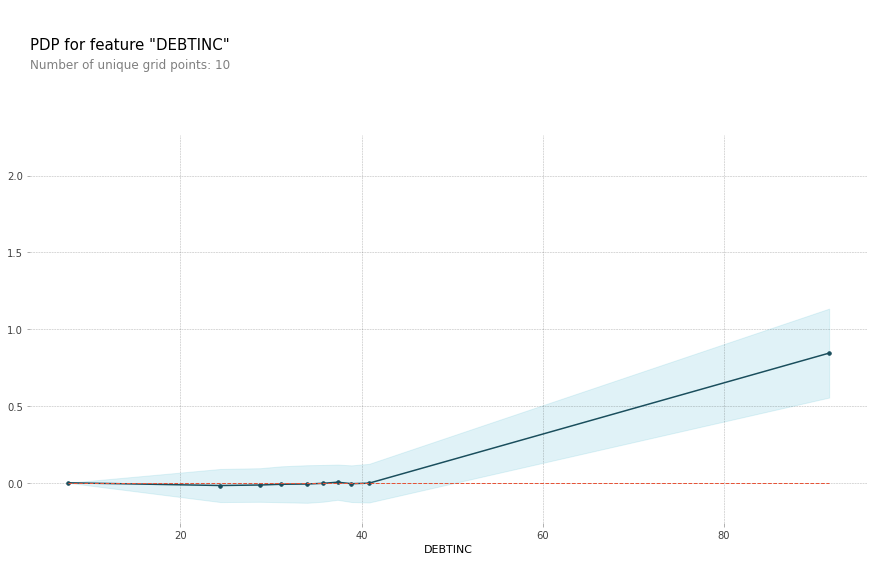

In [ ]:
feat_name = 'DEBTINC'
pdp_dist = pdp.pdp_isolate(model=lgbm_model, dataset=X_test, model_features=features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

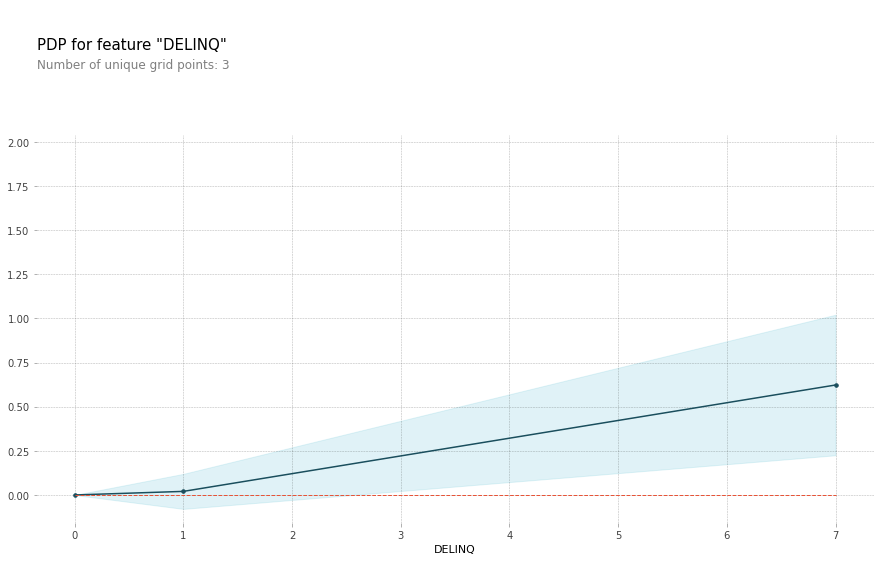

In [ ]:
feat_name = 'DELINQ'
pdp_dist = pdp.pdp_isolate(model=lgbm_model, dataset=X_test, model_features=features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

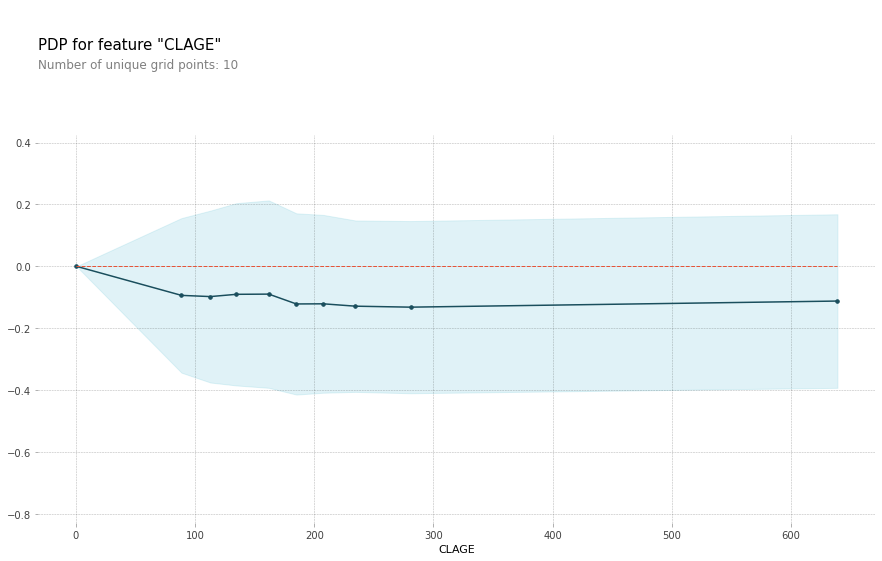

In [ ]:
feat_name = 'CLAGE'
pdp_dist = pdp.pdp_isolate(model=lgbm_model, dataset=X_test, model_features=features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

#### **SHAP Values**

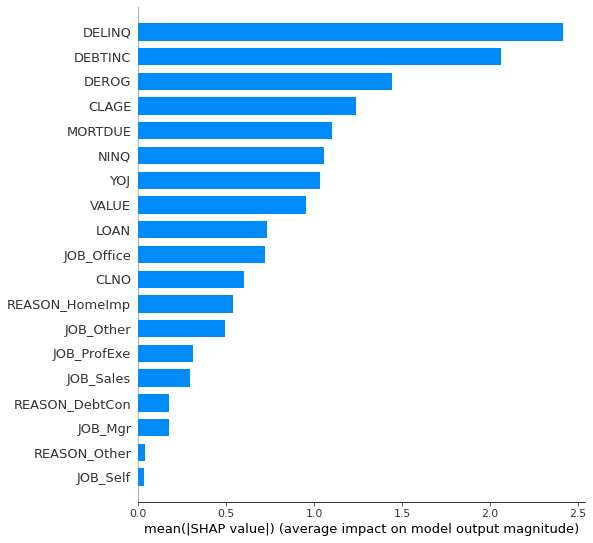

In [ ]:
model = lgbm_model.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

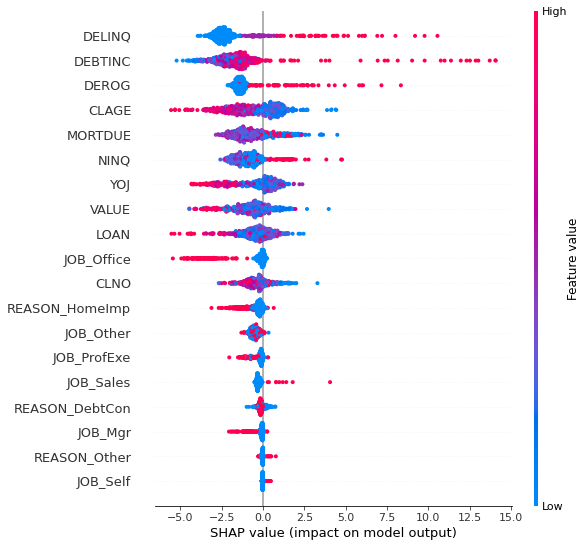

In [ ]:
shap.summary_plot(shap_values[1], X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][1], X_test.iloc[1,:].astype(float))

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][499], X_test.iloc[499,:].astype(float))

### **XGBoost**

#### **Permutation Importance**

In [ ]:
perm = PermutationImportance(xgb_model, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0387 ± 0.0169,DEBTINC
0.0307 ± 0.0029,DELINQ
0.0211 ± 0.0104,MORTDUE
0.0199 ± 0.0090,CLAGE
0.0168 ± 0.0121,LOAN
0.0137 ± 0.0069,DEROG
0.0134 ± 0.0046,JOB_Office
0.0122 ± 0.0039,NINQ
0.0117 ± 0.0061,YOJ
0.0114 ± 0.0040,CLNO


#### **Partial Dependence Plot**

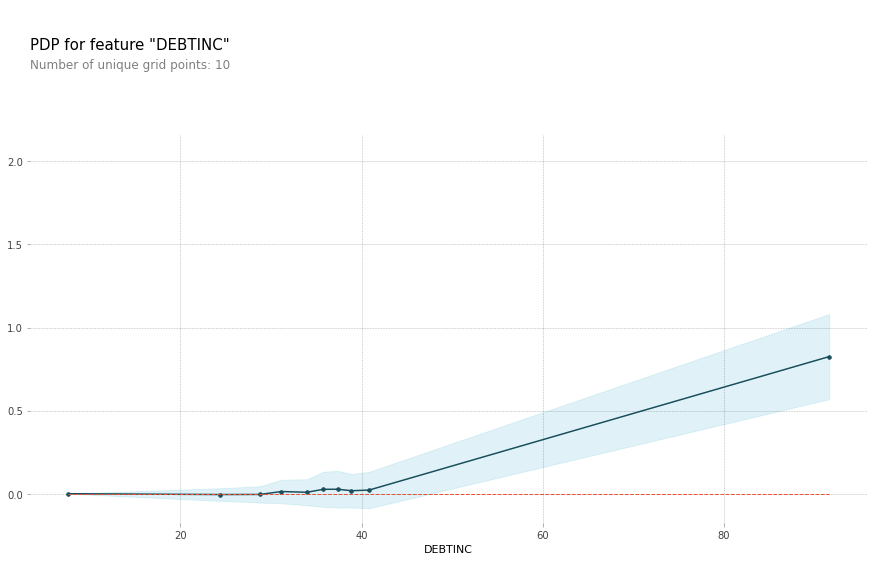

In [ ]:
feat_name = 'DEBTINC'
pdp_dist = pdp.pdp_isolate(model=xgb_model, dataset=X_test, model_features=features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

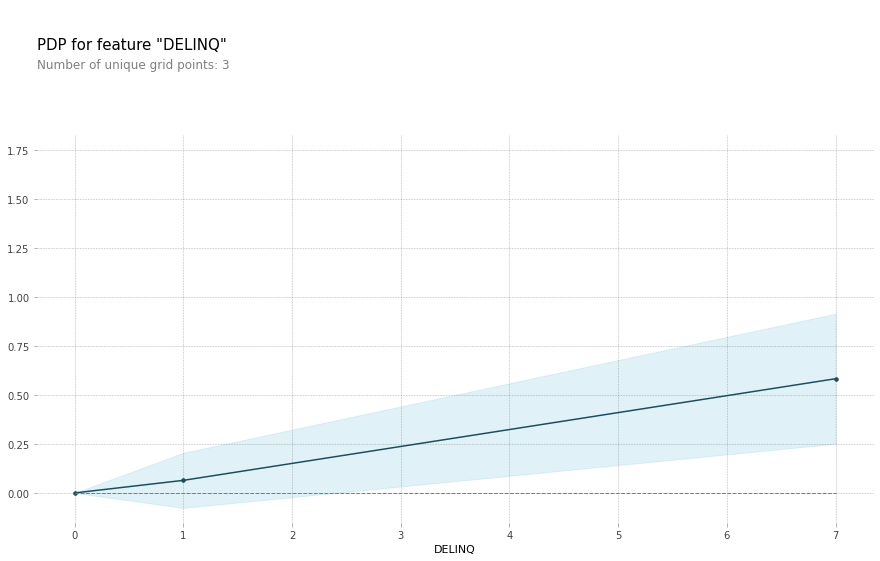

In [ ]:
feat_name = 'DELINQ'
pdp_dist = pdp.pdp_isolate(model=xgb_model, dataset=X_test, model_features=features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

#### **SHAP Values**

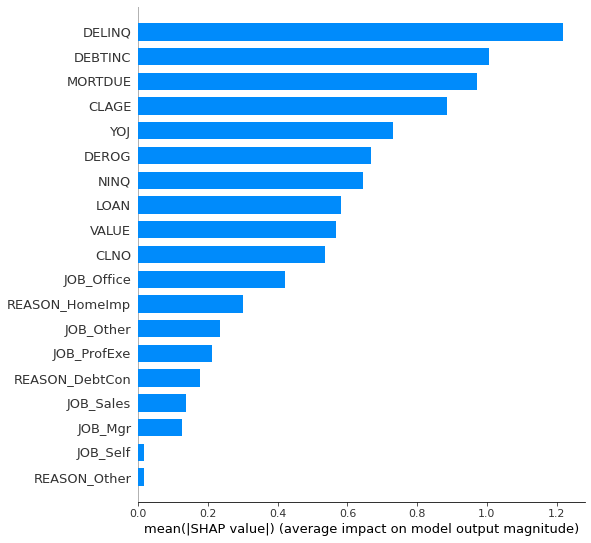

In [ ]:
model = xgb_model.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

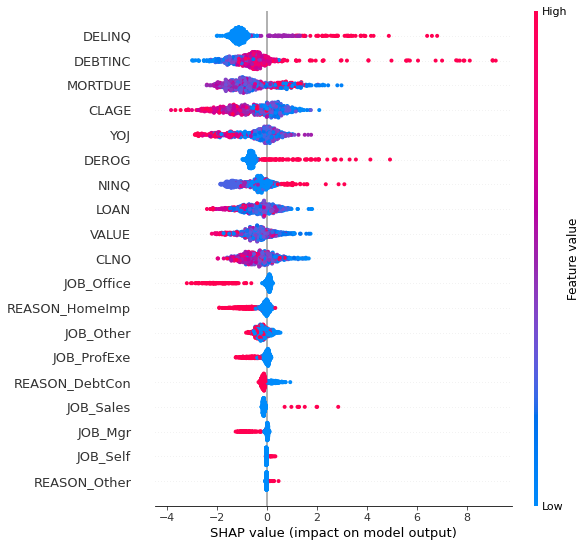

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
data_for_prediction = X_test.iloc[1,:].astype(float)
shap.initjs()
shap.force_plot(explainer.expected_value, explainer.shap_values(data_for_prediction), data_for_prediction)

In [ ]:
data_for_prediction = X_test.iloc[499,:].astype(float)
shap.initjs()
shap.force_plot(explainer.expected_value, explainer.shap_values(data_for_prediction), data_for_prediction)

### **Random Forest**

#### **Permutation Importance**

In [ ]:
perm = PermutationImportance(rf, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0376 ± 0.0109,DELINQ
0.0330 ± 0.0091,DEBTINC
0.0091 ± 0.0043,JOB_Mgr
0.0080 ± 0.0073,NINQ
0.0068 ± 0.0083,JOB_ProfExe
0.0068 ± 0.0046,JOB_Office
0.0037 ± 0.0023,VALUE
0.0028 ± 0.0100,DEROG
0.0026 ± 0.0042,JOB_Other
0.0014 ± 0.0044,YOJ


#### **Partial Dependence Plot**

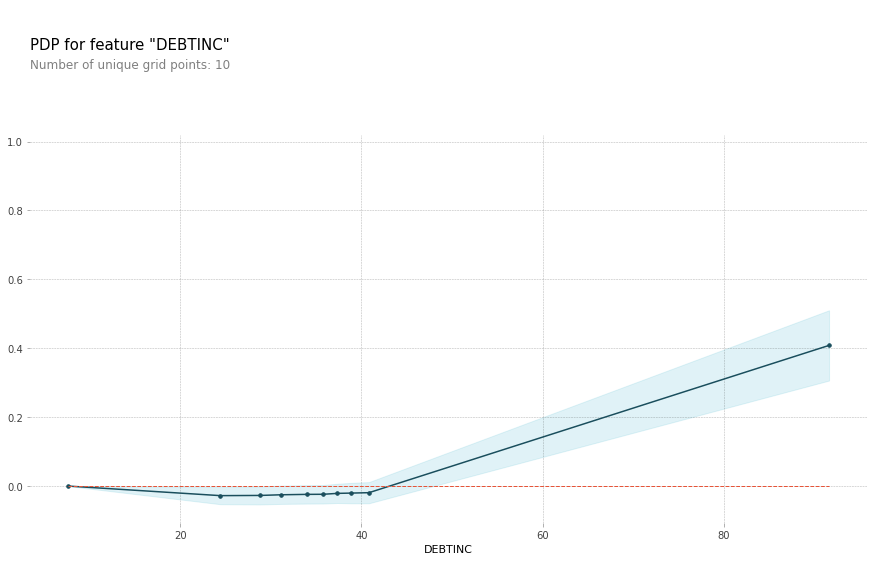

In [ ]:
feat_name = 'DEBTINC'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

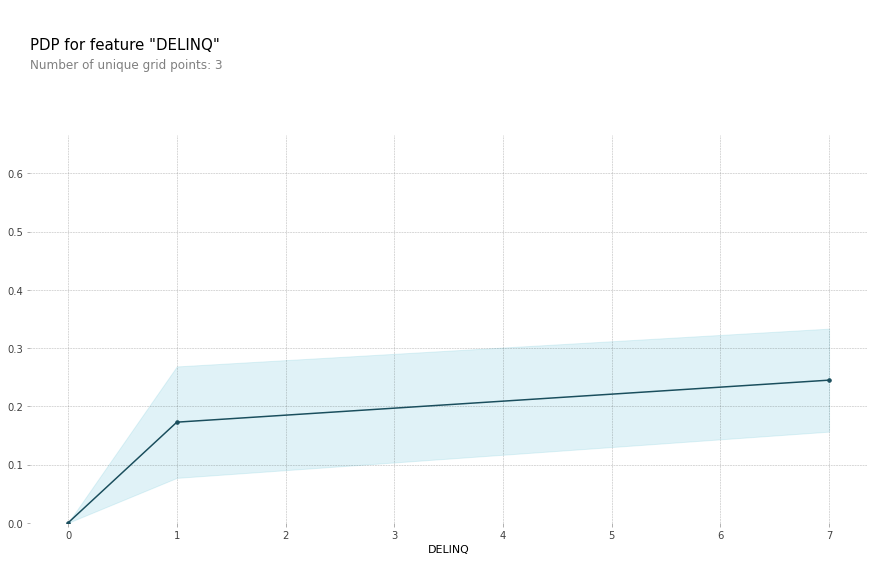

In [ ]:
feat_name = 'DELINQ'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

#### **SHAP Values**

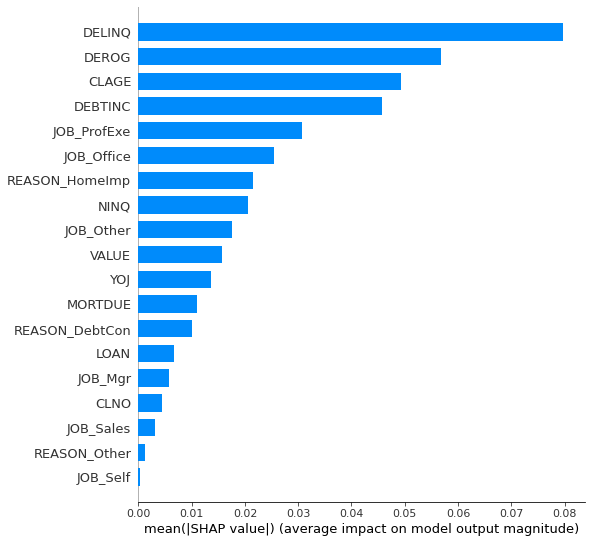

In [ ]:
model = rf.best_estimator_
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

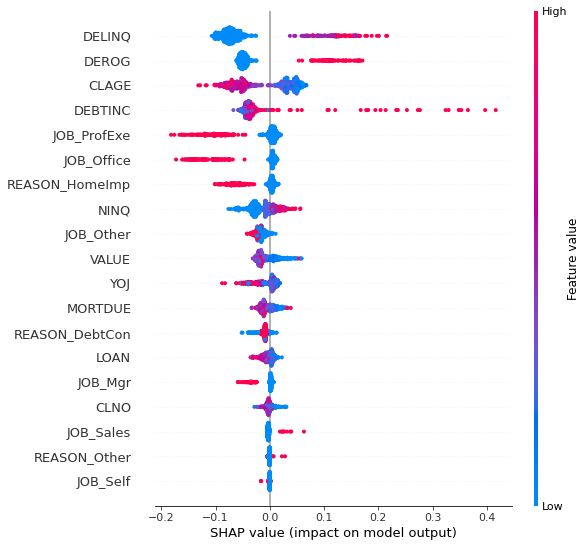

In [ ]:
shap.summary_plot(shap_values[1], X_test)

In [ ]:
data_for_prediction = X_test.iloc[1,:].astype(float)
shap.initjs()
shap.force_plot(explainer.expected_value[1], explainer.shap_values(data_for_prediction)[1], data_for_prediction)

In [ ]:
data_for_prediction = X_test.iloc[499,:].astype(float)
shap.initjs()
shap.force_plot(explainer.expected_value[1], explainer.shap_values(data_for_prediction)[1], data_for_prediction)